[DL tutorial - Creating a Python layer](http://christopher5106.github.io/deep/learning/2015/09/04/Deep-learning-tutorial-on-Caffe-Technology.html)

In [12]:
# Imports
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# The caffe module needs to be on the Python path
import sys
caffe_root = '../' # Run from {caffe_root}/examples (else change)
sys.path.insert(0, caffe_root + 'python')
import caffe

In [3]:
# Set computation mode to CPU
caffe.set_mode_cpu()

**Simple Model:** Single Convolution
- 3 Filters
- Filter size 5 x 5
- Stride of 1
---

`Output = (input - filter size)/stride + 1`

**Network Prototxt File**
- `conv.prototxt`

In [4]:
!touch conv.prototxt
text = """
name: "convolution"
input: "data"
input_dim: 1
input_dim: 1
input_dim: 100
input_dim: 100
layer {
  name: "conv"
  type: "Convolution"
  bottom: "data"
  top: "conv"
  convolution_param {
    num_output: 3
    kernel_size: 5
    stride: 1
    weight_filler {
      type: "gaussian"
      std: 0.01
    }
    bias_filler {
      type: "constant"
      value: 0
    }
  }
}
"""

In [5]:
# Load the net
net = caffe.Net('conv.prototxt', caffe.TEST) # TEST for no dropout
print 'Name of input layer: ', net.inputs
print 'Network data (ordered dictionaries): \n', net.blobs
print 'Input data: ', net.blobs['data']
print 'Computed data in conv layer: ', net.blobs['conv']

Name of input layer:  ['data']
Network data (ordered dictionaries): 
OrderedDict([('data', <caffe._caffe.Blob object at 0x11c2b5f50>), ('conv', <caffe._caffe.Blob object at 0x11c2b5c80>)])
Input data:  <caffe._caffe.Blob object at 0x11c2b5f50>
Computed data in conv layer:  <caffe._caffe.Blob object at 0x11c2b5c80>


In [6]:
# Input data and Computed data shapes
for k, v in net.blobs.iteritems():
    print k, v.data.shape

# Data shapes
print 'Input data shape: ', net.blobs['data'].data.shape
print 'Computed data shape: ', net.blobs['conv'].data.shape

data (1, 1, 100, 100)
conv (1, 3, 96, 96)
Input data shape:  (1, 1, 100, 100)
Computed data shape:  (1, 3, 96, 96)


In [7]:
# Network Parameters
print 'Network parameters: \n', net.params
for k, v in net.params.iteritems():
    print k, '\tWeights: ', v[0].data.shape, '\tBias: ', v[1].data.shape

Network parameters: 
OrderedDict([('conv', <caffe._caffe.BlobVec object at 0x114037e50>)])
conv 	Weights:  (3, 1, 5, 5) 	Bias:  (3,)


In [8]:
# Draw the network
!python ../python/draw_net.py ../examples/conv.prototxt conv_net.png
!open conv_net.png

Drawing net to conv_net.png


![](conv_net.png)

(360, 480)
(1, 1, 360, 480)


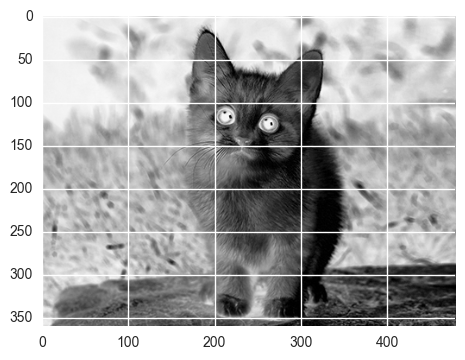

In [9]:
# Network output on an image as input
image = np.array(Image.open(caffe_root + 'examples/images/cat_gray.jpg'))
print image.shape
plt.imshow(image)

# Input dimension
image_input = image[np.newaxis, np.newaxis, :, :]
print image_input.shape

net.blobs['data'].reshape(*image_input.shape)
net.blobs['data'].data[...] = image_input

In [10]:
# Compute the network blobs given the input
output = net.forward()

# Save the network parameters
net.save('conv.caffemodel')

**Pre-trained models**

In [11]:
# CaffeNet model
!python ../python/draw_net.py ../models/bvlc_reference_caffenet/deploy.prototxt caffenet.png
!open caffenet.png

Drawing net to caffenet.png


![](caffenet.png)